In [19]:
# Sarah loves music (incorporating collaboration)

from neurotron import Token, Toy, Cells, Train, Terminal

In [20]:
# To get help on classes Token, Toy, Cells, Train uncomment the appropriate line below:
#help(Token)
#help(Toy)
#help(Cells)
#help(Train)

In [21]:
# Create a Tokenizer

token = Token({'Sarah':[1,1,0,1,1,1,0,1,0,1], 
               'loves':[0,1,1,1,0,1,1,0,1,1],
               'music':[1,1,1,0,0,1,0,1,1,1],
               '.':    [0,0,0,0,0,0,0,0,0,0]})

# A simpler way would be to consult the Toy class:

token = Toy('Sarah').token
print(token)

Token({
  'Sarah': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
  'loves': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
  'music': [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
  '.': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
})


In [22]:
# The Token class provides a method for decoding tokens
print(token)
print(token.decode([1,1,0,1,1,1,0,1,0,1]))  # token for 'Sarah'
print(token.decode([0,1,1,1,0,1,1,0,1,1]))  # token for 'loves'
print(token.decode([1,1,1,0,0,1,0,1,1,1]))  # token for 'music' 

Token({
  'Sarah': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
  'loves': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
  'music': [1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
  '.': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
})
Sarah
loves
music


In [23]:
# if ambiguous patterns are presented to the decoder, it returns a tuple of all tokens which might
# be represented by the given pattern.

print(token.decode([1,1,1,1,0,1,1,1,1,1]))  # union of token 'loves', 'music' 

['loves', 'music', '.']


In [24]:
# Enough about tokens! Let's create a 1 x 3 cell cluster (3 neurotron cells)

m = 1  # number of cluster rows
n = 3  # number of cluster columns
d = 1  # number of detectors per terminal
s = 3  # number of synapses per detector

shape = (m,n,d,s)
cells = Cells(shape,token)

# Employing the Toy class our cell cluster could be setup as a two-liner:

toy = Toy('Sarah')
cells = Cells(toy.shape,toy.token)

# we have eight (binary) states per cell:
# - U: stimulation state  (blue)
# - Q: excitation state   (violet)
# - D: depression state   (dark gray)
# - B: bursts state       (orange)
# - X: prediction state   (green)
# - Y: activation state   (red)
# - S: spiking state      (white)
# - L: learning state     (yellow)

# initially none of these states are activated

from neurotron import Excite
print(cells)
excite = Excite(*shape,token)
cells._excite = Terminal(Excite(*shape,token))
cells._excite.map()
cells._excite(token['music'])

|-|-|-|
eta: 0.5 , theta: 7 , delta: (0.1, 0.1)
K: +--000/0---+--001/1---+--002/2---+
   |0123456789|0123456789|0123456789|
   +----------+----------+----------+
P: None
W: +--000/0---+--001/1---+--002/2---+
   |1101110101|0111011011|1110010111|
   +----------+----------+----------+


[0 0 1]

In [25]:
# Our network has a pooler which maps from B^10 to B^3.
# So we have to pimp our token decoder in order that it recognices also
# patterns from B^3

#cells._excite = Terminal(Excite(1,3,1,10,token))
#token.pimp(cells._excite)

#print(cells.token._decoder['100'])
print(cells.token.decode([0,1,0]))
print(cells.token.decode([0,0,1]))
cells.token.decode()

{'1101110101': 'Sarah',
 '0111011011': 'loves',
 '1110010111': 'music',
 '0000000000': '.',
 '110': 'Sarah',
 '011': 'loves',
 '111': 'music',
 '000': '.'}

In [26]:
# States can be accessed as 1-dimensional arrays or 2-dimensional matrices
# E.g.: cells.X[i,j] = cells.X[k] with k = m*j + i
# Let us set some states:

    # cell [0] or [0,0]

cells.X[0,0] = 1     # cell [0] or [0,0]
cells.S[0] = 1
cells.D[0] = 1

    # cell [2] or [0,2]

cells.U[1] = 1
cells.Q[1] = 1      # hides U state in the display
cells.Y[1] = 1
cells.S[1] = 1
cells.L[1] = 1      # hides S state in the display
cells.D[1] = 1
cells.B[1] = 1      # hides D state in the display

    # cell [2] or [0,2]

cells.U[2] = 1
cells.S[2] = 1


# Let us display the cell cluster's states. 

print(cells)

|XDS|UQLDBYS|US|


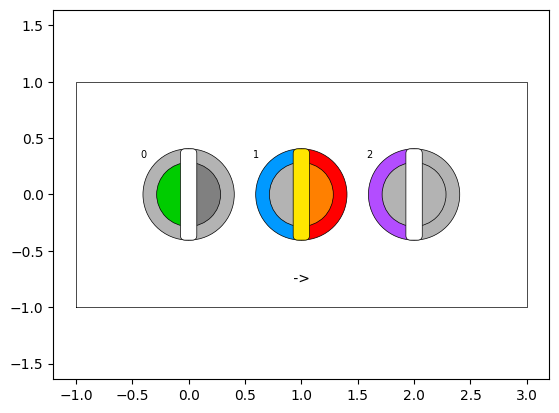

In [27]:
# Now Let us plot the cell cluster's states. 
# Only 5 states per cell are displayed (to present state info as compact as possible). 
# This means that states U,S,D might be potentially hidden when displayed, if states Q,L,B 
# are set (have logical value 1):
# - Q hides U
# - L hides S
# - B hides D
# mind: the state values are not actually over written, it is only a matter of (compact) plotting

title = token.decode(cells.Y)
cells.plot(title)
